<a href="https://colab.research.google.com/github/nkurinsky/THz-FTS/blob/master/python/Notebooks/BBspectrum_FTS_(Windowing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pylab import *
from scipy import fft
import matplotlib.pyplot as plt
from scipy.signal import periodogram as psd
import numpy as np
from scipy.signal import find_peaks
from math import sqrt, sin
from cmath import pi
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/BREAD Experiment/FTS Modeling/lib/')
from BlackbodyFunctions import *
from FTSFunctions import *

In [0]:
dt = 0.1 #micron, step size
fs = 1/dt #micron^-1, inv. step size (multiply by h gives energy resolution)
T = 12e3 #micron, total travel length
sigma = 0 #2e-8  #noise offset intensity

c_micron_per_second = 3.0e8 * 1e6
Hz_to_THz = 1e-12

adjustment = False 

#for blackbody spectrum, decide wavelength range and number of wavelength slices (should correspond to the number of peaks in that window after transform)
min_wavelength = 0.001 #micron
max_wavelength = 1500.0 #micron
num_slices = 10000 #1e6
wavelength_slice_size = (max_wavelength - min_wavelength)/num_slices #micron
wavelengths = arange(min_wavelength, max_wavelength, wavelength_slice_size)

freq_slice_size = 0.1 #THz
wavelength_bool = True

def get_psd_inputs(filter_type):
  x, y_nofilter, weights_nofilter = blackbody_input_function(wavelength_bool, wavelengths, freq_slice_size)
  x, y_filter, weights, filter_val = blackbody_input_function(wavelength_bool, wavelengths, freq_slice_size, filter_type)
  return(y_nofilter, y_filter, weights, filter_val)

def get_bandpass(windowing, y_nofilter, y, wavelengths,  filter_val):
  frequency_nofilter, spectrum_nofilter = psd_frequency(y_nofilter, windowing) #frequency, spectrum
  frequency, spectrum = psd_frequency(y, windowing) #frequency, spectrum

  if adjustment: #subtract off 1e-7 from the spectrum values
    spectrum_nofilter = adjust_spectrum(spectrum_nofilter)
    spectrum = adjust_spectrum(spectrum)

  return(frequency,  spectrum/spectrum_nofilter, c_micron_per_second*Hz_to_THz/wavelengths, filter_val)

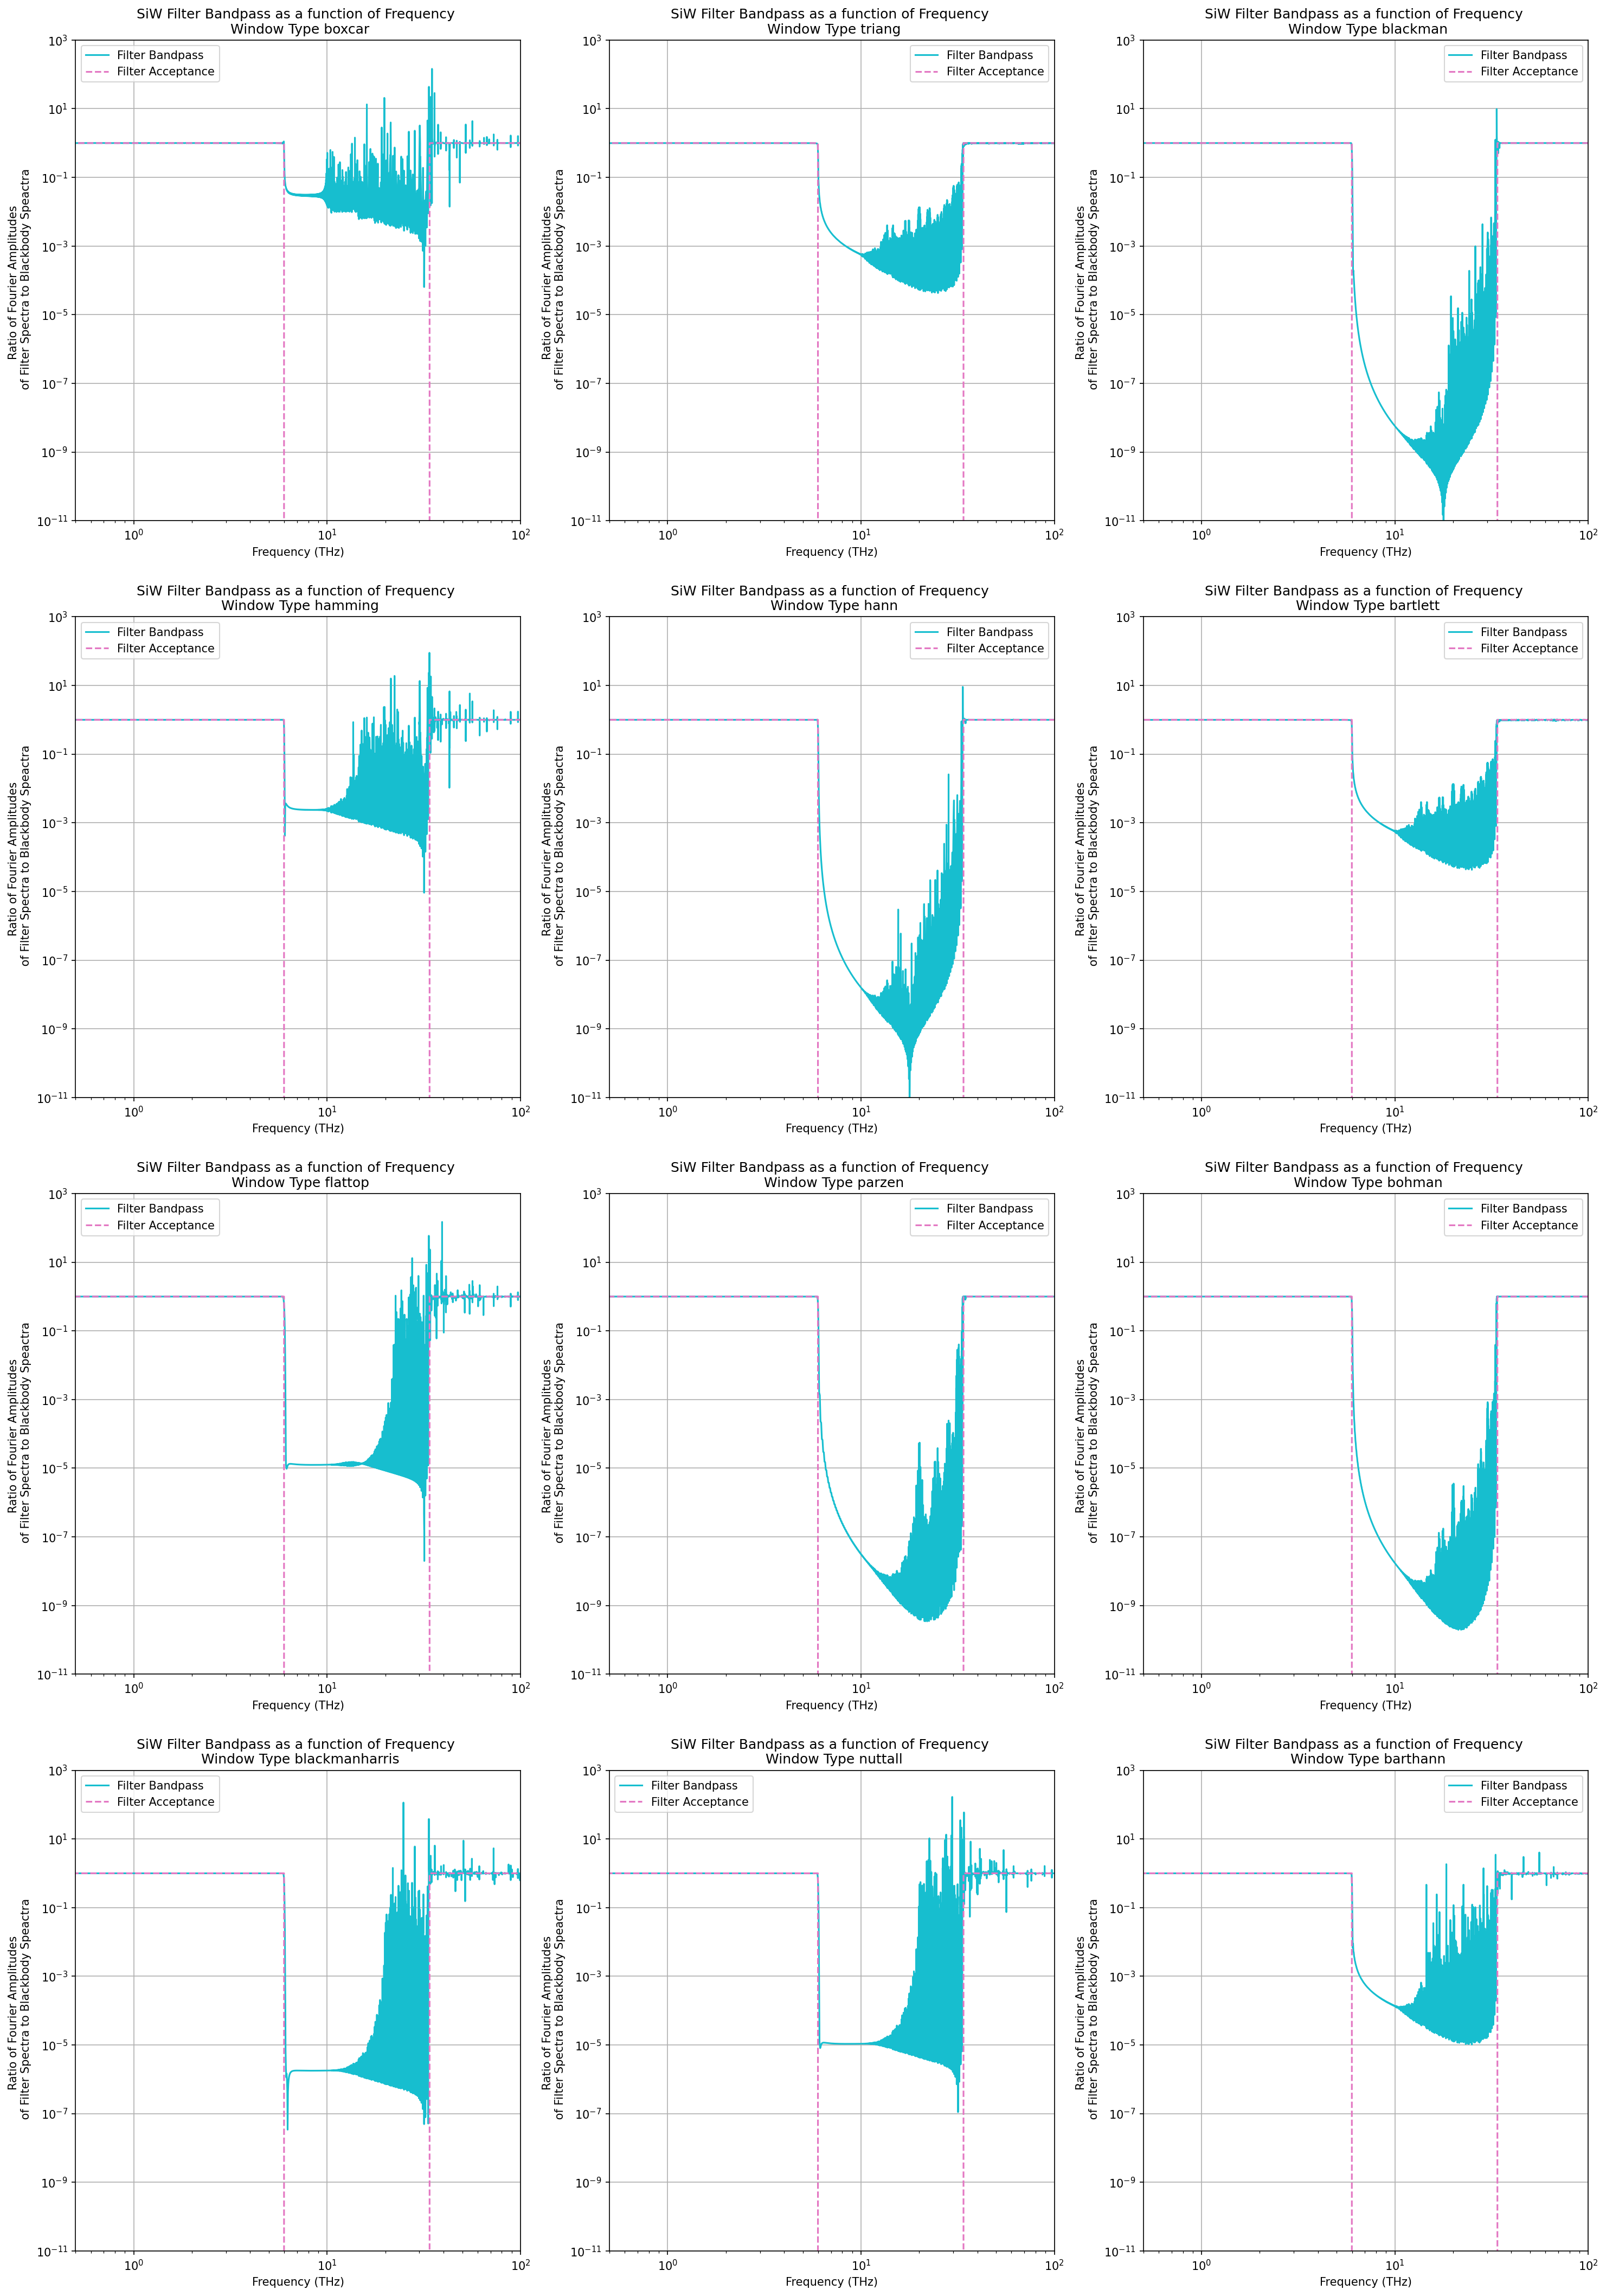

In [0]:
windows = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 'flattop', 'parzen', 'bohman', 'blackmanharris' , 'nuttall', 'barthann']

fig = plt.figure(figsize=(24, 36), dpi=150)  
y_nofilter, y, weights, filter_val = get_psd_inputs('SiW')
for i in range(len(windows)):
  freq, ratio, filter_frequancies, filter_values = get_bandpass(windows[i], y_nofilter, y, wavelengths, filter_val) #(filter_type, windowing)
  plt.subplot(4, 3, i+1)
  title = "SiW Filter Bandpass as a function of Frequency \n Window Type " + str(windows[i])
  plt.title(title)
  plt.semilogy(freq, ratio, label = "Filter Bandpass", color='C9')
  plt.semilogy(filter_frequancies, filter_values, '--', label = 'Filter Acceptance', color='C6')
  plt.grid(True)
  plt.legend()
  plt.ylim(1e-11, 1e3)
  plt.xlim(5e-1, 100)
  plt.xlabel('Frequency (THz)')
  plt.ylabel("Ratio of Fourier Amplitudes \n of Filter Spectra to Blackbody Speactra")
  plt.xscale('log')

plt.show()

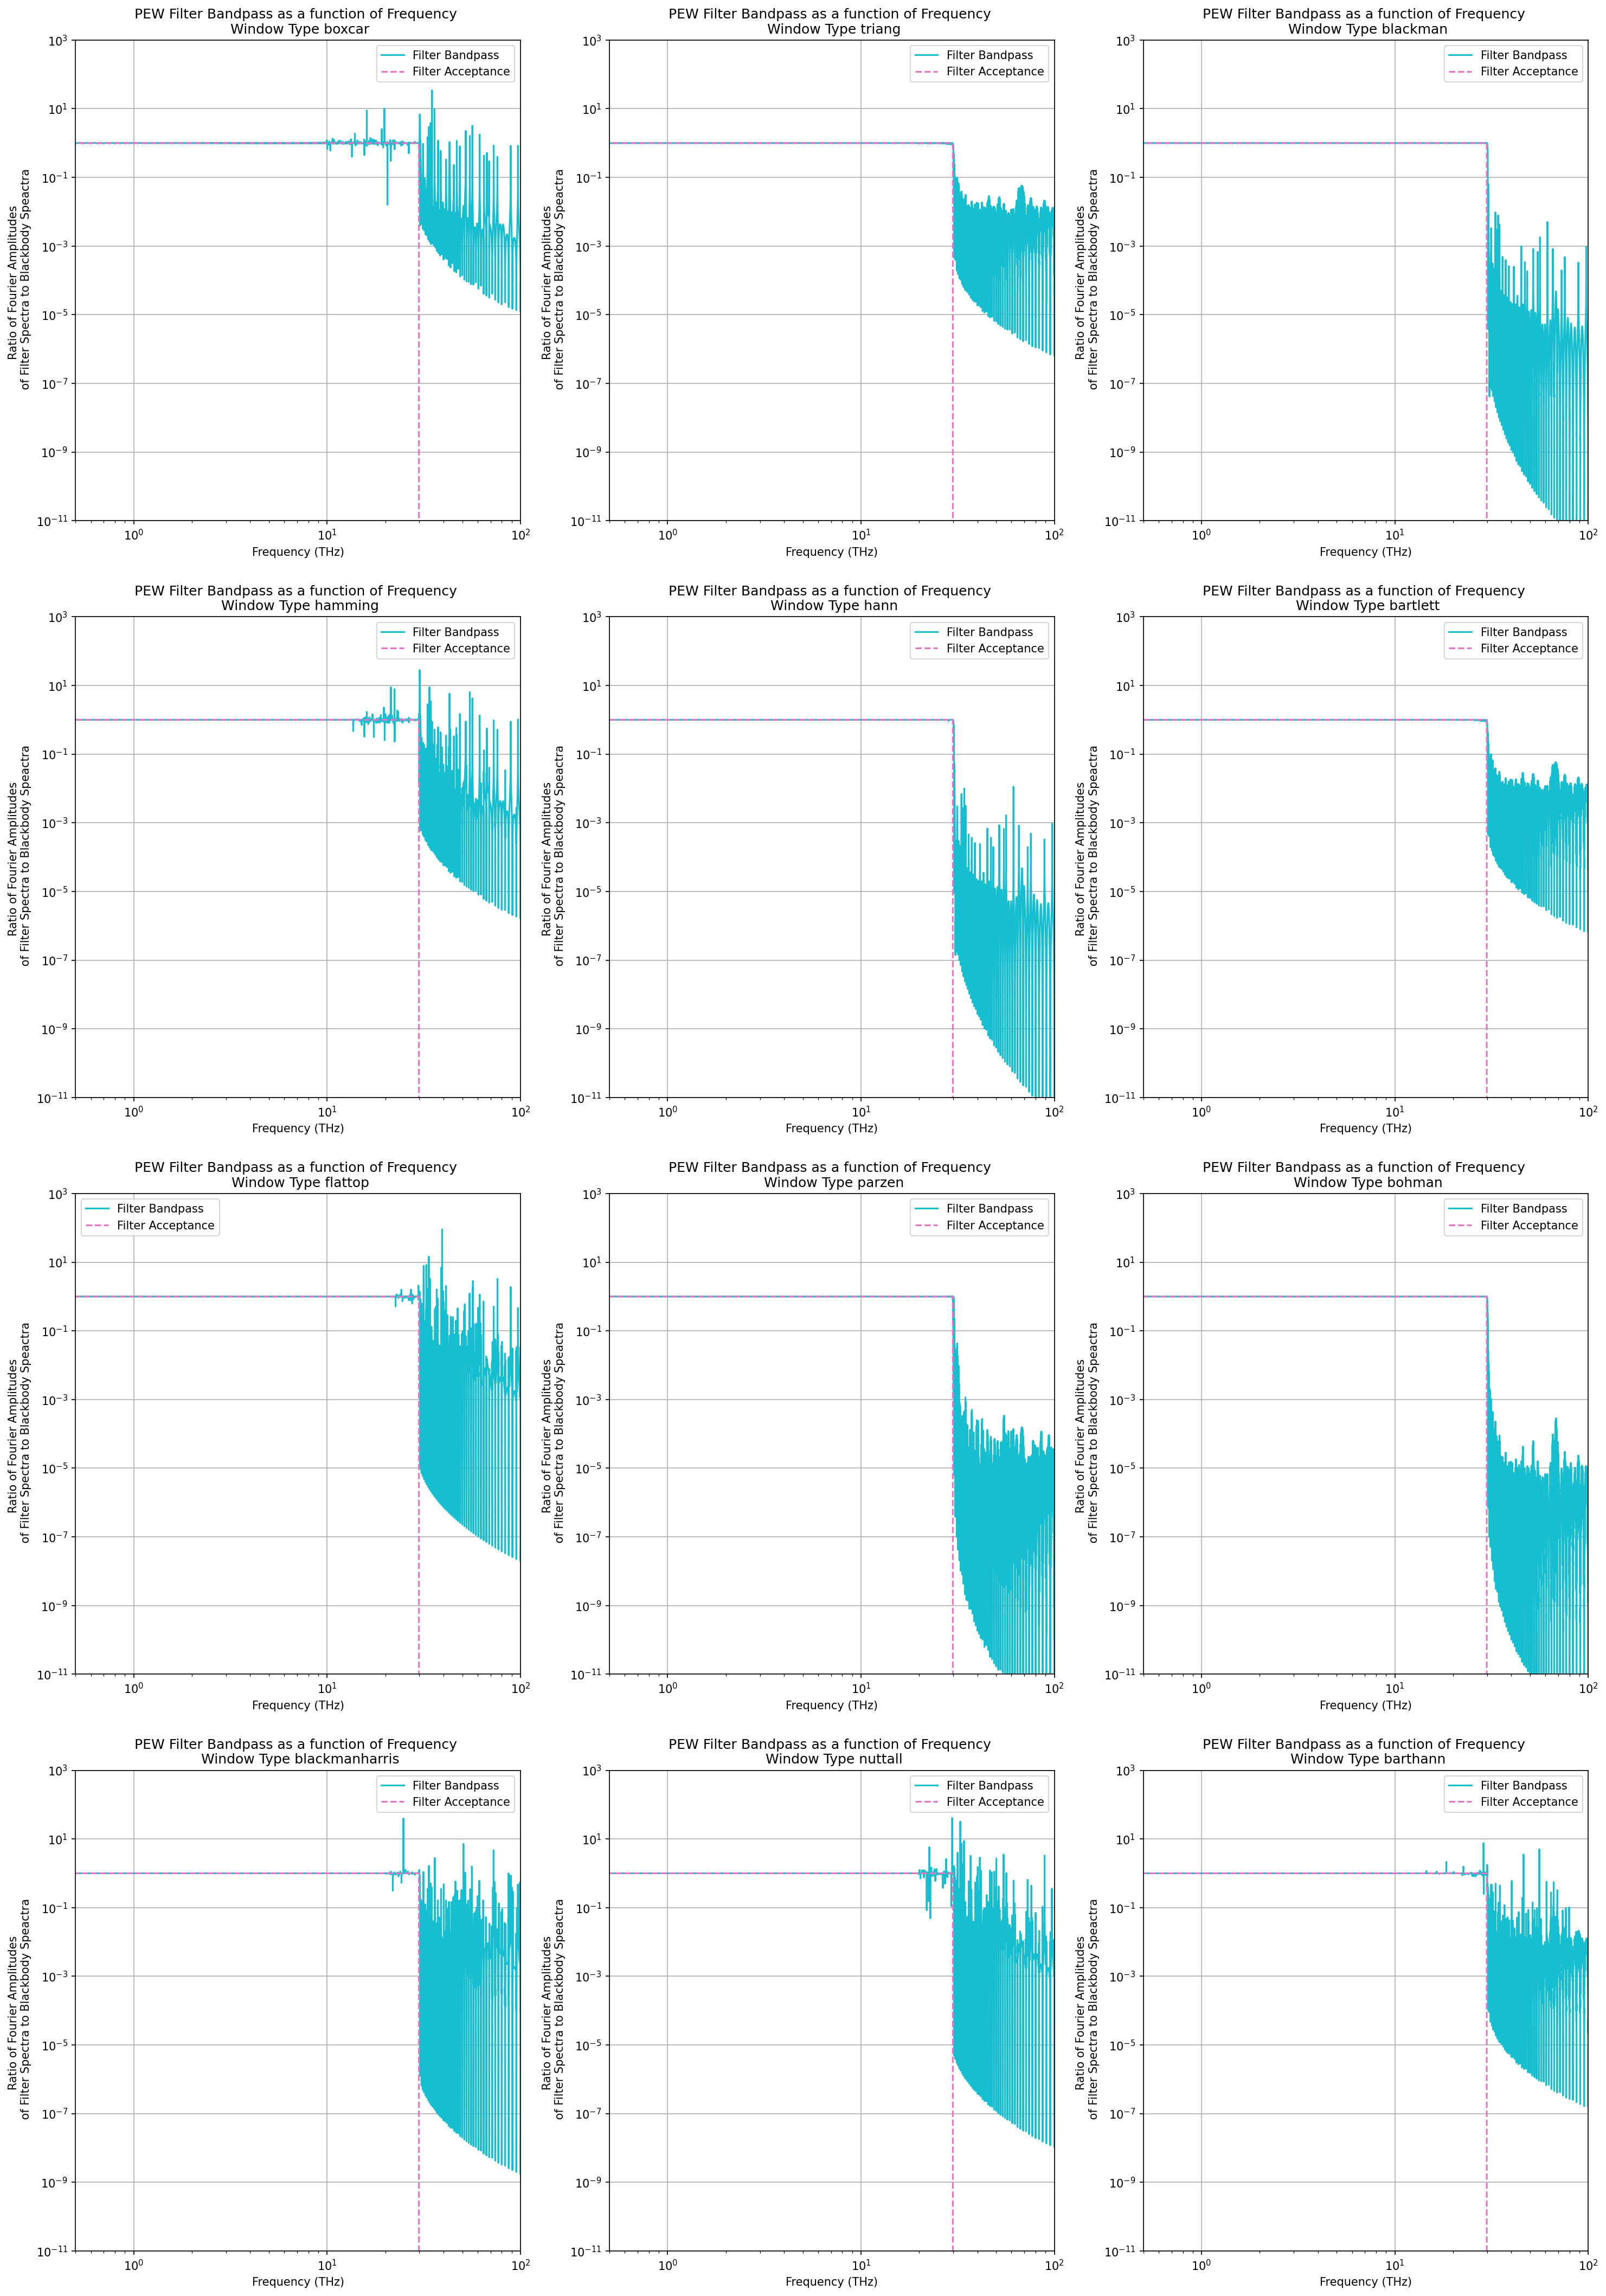

In [0]:
fig = plt.figure(figsize=(24, 36), dpi=150)  
y_nofilter, y, weights, filter_val = get_psd_inputs('PEW')
for i in range(len(windows)):
  freq, ratio, filter_frequancies, filter_values = get_bandpass(windows[i], y_nofilter, y, wavelengths, filter_val) #(filter_type, windowing)
  plt.subplot(4, 3, i+1)
  title = "PEW Filter Bandpass as a function of Frequency \n Window Type " + str(windows[i])
  plt.title(title)
  plt.semilogy(freq, ratio, label = "Filter Bandpass", color='C9')
  plt.semilogy(filter_frequancies, filter_values, '--', label = 'Filter Acceptance', color='C6')
  plt.grid(True)
  plt.legend()
  plt.ylim(1e-11, 1e3)
  plt.xlim(5e-1, 100)
  plt.xlabel('Frequency (THz)')
  plt.ylabel("Ratio of Fourier Amplitudes \n of Filter Spectra to Blackbody Speactra")
  plt.xscale('log')

plt.show()